In [28]:
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
df = pd.read_json('sale_data.json')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28940 entries, 0 to 28939
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   platform              28940 non-null  object             
 1   link                  28940 non-null  object             
 2   price                 28940 non-null  int64              
 3   address               28940 non-null  object             
 4   description           28940 non-null  object             
 5   housing_type          28940 non-null  object             
 6   total_area            28940 non-null  float64            
 7   floor                 28940 non-null  int64              
 8   total_floors          28940 non-null  int64              
 9   rooms_count           28940 non-null  int64              
 10  name                  28940 non-null  object             
 11  underground_name      23152 non-null  object             
 12  unde

In [31]:
df.head()

,platform,link,price,address,description,housing_type,total_area,floor,total_floors,rooms_count,name,underground_name,underground_distance,published_at,latitude,longitude,payment_type,monthly_payment
0,domclick,https://domclick.ru/card/sale__flat__1987548956,22999990,"Россия, Москва, Ленинский проспект, 135к3",ОТЛИЧНОЕ ПРЕДЛОЖЕНИЕ! Успейте купить!\nПродает...,Квартира,73.0,5,16,3,"Сдается 3-комнатная, 73.0 м²",Тропарево,0.86,2023-12-08 15:15:48+00:00,55.641529,37.478307,premium,254921
1,domclick,https://domclick.ru/card/sale__flat__1999833410,8633000,"Россия, Москва, Ленинский проспект, 158",1414. Лот находится в платной брони.,Квартира,17.5,14,22,0,"Сдается 0-комнатная, 17.5 м²",Тропарево,1.30,2023-12-15 14:45:04.487887+00:00,55.651186,37.483095,premium,95684
2,domclick,https://domclick.ru/card/sale__flat__1889326688,14044800,"Россия, Москва, Суворовская улица, 19с2","Субсидированная ипотека от 12,8%! Акция ""Купи ...",Квартира,46.2,2,3,0,"Сдается 0-комнатная, 46.2 м²",Преображенская площадь,0.99,2023-10-07 21:41:51.530550+00:00,55.789709,37.708778,premium,155666
3,domclick,https://domclick.ru/card/sale__flat__1930836005,14300000,"Россия, Москва, Енисейская улица, 10",Продаётся уютная 3х комнатная квартира в 9-ти...,Квартира,50.5,2,9,3,"Сдается 3-комнатная, 50.5 м²",Свиблово,0.95,2023-11-05 08:52:00+00:00,55.860822,37.661230,premium,158494
4,domclick,https://domclick.ru/card/sale__flat__1964083748,7990000,"Россия, Москва, Электрозаводская улица, 14с1","Прекрасное предложение для тех, кто хочет полу...",Квартира,19.2,1,8,0,"Сдается 0-комнатная, 19.2 м²",Электрозаводская,0.98,2023-11-24 14:11:44.589536+00:00,55.787513,37.706766,premium,88557


Таблица состоит из **28940** строк (квартир) и **18** столбцов:
- **platform** - наименование платформы на которой размещено объявление
- **link** - ссылка на объявление
- **price** - цена, руб.
- **address** - адрес квартиры
- **description** - описание квартиры
- **housing_type** - тип продаваемого помещения (в нашем случае только квартира)
- **total_area** - площадь квартиры, м2
- **floor** - номер этажа
- **total_floors** - кол-во этажей в доме
- **rooms_count** - количество комнат
- **name** - наименование объявления
- **underground_name** - наименование ближайшей станции метро
- **underground_distance** - расстояние до ближайшей станции метро, км
- **published_at** - время публикации
- **latitude** - широта, град.
- **longitude** - долгота, град.
- **payment_type** - статус продавца, размещающего объявление (в нашем случае везде premium)
- **monthly_payment** - возможный ежемесячный платеж по ипотеке для покупки квартиры

In [32]:
data = df[['price', 'address', 'description', 'total_area', 'floor',
          'total_floors', 'rooms_count', 'underground_name','underground_distance', 'latitude', 'longitude']]
data.head()

,price,address,description,total_area,floor,total_floors,rooms_count,underground_name,underground_distance,latitude,longitude
0,22999990,"Россия, Москва, Ленинский проспект, 135к3",ОТЛИЧНОЕ ПРЕДЛОЖЕНИЕ! Успейте купить!\nПродает...,73.0,5,16,3,Тропарево,0.86,55.641529,37.478307
1,8633000,"Россия, Москва, Ленинский проспект, 158",1414. Лот находится в платной брони.,17.5,14,22,0,Тропарево,1.30,55.651186,37.483095
2,14044800,"Россия, Москва, Суворовская улица, 19с2","Субсидированная ипотека от 12,8%! Акция ""Купи ...",46.2,2,3,0,Преображенская площадь,0.99,55.789709,37.708778
3,14300000,"Россия, Москва, Енисейская улица, 10",Продаётся уютная 3х комнатная квартира в 9-ти...,50.5,2,9,3,Свиблово,0.95,55.860822,37.661230
4,7990000,"Россия, Москва, Электрозаводская улица, 14с1","Прекрасное предложение для тех, кто хочет полу...",19.2,1,8,0,Электрозаводская,0.98,55.787513,37.706766


Были убраны незначащие признаки, которые не повлияют на результат

In [33]:
data['underground_distance'] = data['underground_distance'].fillna(10)
data['underground_name'] = data['underground_name'].fillna('Поблизости нет метро')

/var/folders/hg/_jvns44d4qz9_7lpkkrlngs40000gn/T/ipykernel_43121/4193525646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['underground_distance'] = data['underground_distance'].fillna(10)
/var/folders/hg/_jvns44d4qz9_7lpkkrlngs40000gn/T/ipykernel_43121/4193525646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['underground_name'] = data['underground_name'].fillna('Поблизости нет метро')


Факт отсутствия близлежащего метро, может сильно отразится на цене, поэтому этот признак необходимо оставить и заменить пропущенные значения.

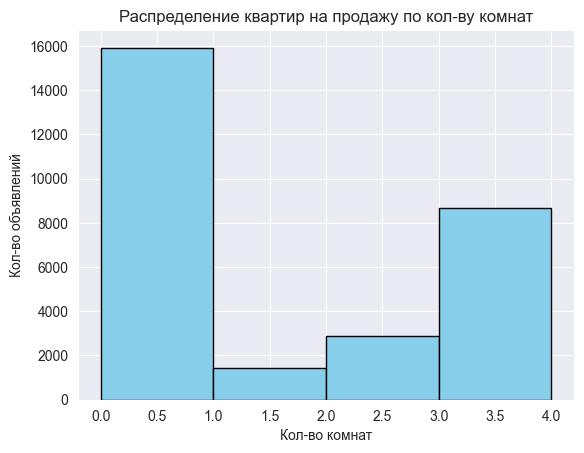

In [34]:
# Построение гистограммы
plt.hist(data['rooms_count'], bins=[0, 1, 2, 3, 4], color='skyblue', edgecolor='black')

# Настройка графика
plt.title('Распределение квартир на продажу по кол-ву комнат')
plt.xlabel('Кол-во комнат')
plt.ylabel('Кол-во объявлений')

# Отображение гистограммы
plt.show()

Как мы видим у нас есть дисбаланс классов по количеству комнат:
- 0 - это квартиры-студии, там нет спальных комнат, поэтому указывается что их ноль. В Москве их больше всего стоит на продажу, так как в связи со своей относительно небольшой стоимостью они привлекательно для инвестиций.
- 1 и 2 - это квартиры которые реже продают, чаще сдают в аренду, так как они самые ликвидные в этом рынке.
- 3+ - это более частые квартиры на продажу, так как их менее выгодно сдавать и они довольно дорогие. Обычно их используют для жизни, чем для инвестиций.

Такой дисбаланс можно учесть при построении модели.

In [35]:
data

,price,address,description,total_area,floor,total_floors,rooms_count,underground_name,underground_distance,latitude,longitude
0,22999990,"Россия, Москва, Ленинский проспект, 135к3",ОТЛИЧНОЕ ПРЕДЛОЖЕНИЕ! Успейте купить!\nПродает...,73.0,5,16,3,Тропарево,0.86,55.641529,37.478307
1,8633000,"Россия, Москва, Ленинский проспект, 158",1414. Лот находится в платной брони.,17.5,14,22,0,Тропарево,1.30,55.651186,37.483095
2,14044800,"Россия, Москва, Суворовская улица, 19с2","Субсидированная ипотека от 12,8%! Акция ""Купи ...",46.2,2,3,0,Преображенская площадь,0.99,55.789709,37.708778
3,14300000,"Россия, Москва, Енисейская улица, 10",Продаётся уютная 3х комнатная квартира в 9-ти...,50.5,2,9,3,Свиблово,0.95,55.860822,37.661230
4,7990000,"Россия, Москва, Электрозаводская улица, 14с1","Прекрасное предложение для тех, кто хочет полу...",19.2,1,8,0,Электрозаводская,0.98,55.787513,37.706766
...,...,...,...,...,...,...,...,...,...,...,...
28935,6227292,"Россия, Москва, Солнечногорский проезд, 17",Комплекс SunCity17 — отреставрированный особня...,19.3,3,3,0,Селигерская,2.26,55.860620,37.525028
28936,6206601,"Россия, Москва, Солнечногорский проезд, 17",Комплекс SunCity17 — отреставрированный особня...,18.7,3,3,0,Селигерская,2.26,55.860620,37.525028
28937,7198000,"Россия, Москва, Солнечногорский проезд, 17",Комплекс SunCity17 — отреставрированный особня...,25.1,1,3,0,Селигерская,2.26,55.860620,37.525028
28938,6248147,"Россия, Москва, Солнечногорский проезд, 17",Комплекс SunCity17 — отреставрированный особня...,19.2,2,3,0,Селигерская,2.26,55.860620,37.525028


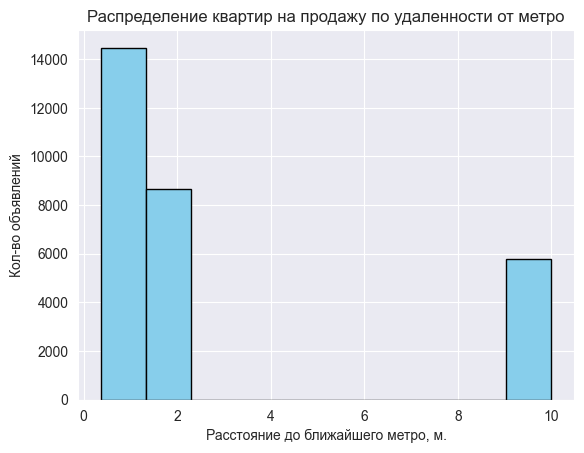

In [36]:
# Построение гистограммы
plt.hist(data['underground_distance'], color='skyblue', edgecolor='black')

# Настройка графика
plt.title('Распределение квартир на продажу по удаленности от метро')
plt.xlabel('Расстояние до ближайшего метро, м.')
plt.ylabel('Кол-во объявлений')

# Отображение гистограммы
plt.show()

Так как мы смотрим квартиры в Москве, а метро в этом городе очень распростронено, то больше всего квартир для продажи находятся в радиусе 1км от станции метрополитена, реже в радиусе двух. Но при этом есть большая доля объявлений, у которых рядом метро нет (например, это распространено в Новой Москве). Доля таких объявлений составляет около 20%.

Это нужно учитывать при будущем кодировании признаков.

In [37]:
data[['price', 'total_area', 'floor', 'total_floors', 'rooms_count']].corr()

,price,total_area,floor,total_floors,rooms_count
price,1.000000,0.851973,0.765272,0.530374,0.676910
total_area,0.851973,1.000000,0.634196,0.432914,0.913987
floor,0.765272,0.634196,1.000000,0.641241,0.513988
total_floors,0.530374,0.432914,0.641241,1.000000,0.402133
rooms_count,0.676910,0.913987,0.513988,0.402133,1.000000


Признаки "Общая площать" и "Количество комнат" сильно коррелируют друг с другом. В целом цена за квартиру выставляется в пересчете на квадратнеы метры, поэтому количество комнат можно убрать, но оставить флаг на то, является ли эта квартира студией или нет, чтобы не потерять важную информацию.

In [38]:
data.loc[:, 'studio'] = 0
data.loc[data['rooms_count'] == 0, 'studio'] = 1

/var/folders/hg/_jvns44d4qz9_7lpkkrlngs40000gn/T/ipykernel_43121/1433545161.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'studio'] = 0


In [39]:
data[['price', 'total_area', 'floor', 'total_floors', 'studio']].corr()

,price,total_area,floor,total_floors,studio
price,1.000000,0.851973,0.765272,0.530374,-0.550772
total_area,0.851973,1.000000,0.634196,0.432914,-0.832294
floor,0.765272,0.634196,1.000000,0.641241,-0.352178
total_floors,0.530374,0.432914,0.641241,1.000000,-0.251599
studio,-0.550772,-0.832294,-0.352178,-0.251599,1.000000


Ситуация улучшилась, мультиколлинеарность с другими признаками уменьшилась.

In [40]:
data.columns

Index(['price', 'address', 'description', 'total_area', 'floor',
       'total_floors', 'rooms_count', 'underground_name',
       'underground_distance', 'latitude', 'longitude', 'studio'],
      dtype='object')

In [41]:
# Удаляем бесполезные или нерелевантные признаки
data.drop(['description', 'address'], axis=1, inplace=True)

/var/folders/hg/_jvns44d4qz9_7lpkkrlngs40000gn/T/ipykernel_43121/2333796235.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['description', 'address'], axis=1, inplace=True)


In [42]:
data.head()

,price,total_area,floor,total_floors,rooms_count,underground_name,underground_distance,latitude,longitude,studio
0,22999990,73.0,5,16,3,Тропарево,0.86,55.641529,37.478307,0
1,8633000,17.5,14,22,0,Тропарево,1.30,55.651186,37.483095,1
2,14044800,46.2,2,3,0,Преображенская площадь,0.99,55.789709,37.708778,1
3,14300000,50.5,2,9,3,Свиблово,0.95,55.860822,37.661230,0
4,7990000,19.2,1,8,0,Электрозаводская,0.98,55.787513,37.706766,1


In [43]:
data = pd.get_dummies(data, columns=['underground_name'])

In [44]:
data.columns

Index(['price', 'total_area', 'floor', 'total_floors', 'rooms_count',
       'underground_distance', 'latitude', 'longitude', 'studio',
       'underground_name_Маяковская', 'underground_name_Нижегородская',
       'underground_name_Поблизости нет метро',
       'underground_name_Преображенская площадь', 'underground_name_Саларьево',
       'underground_name_Свиблово', 'underground_name_Селигерская',
       'underground_name_Тропарево', 'underground_name_Электрозаводская',
       'underground_name_станция Верхние Котлы'],
      dtype='object')

In [45]:
# Целевая переменная (цена жилья)
y = data['price']

# Предикторы
X = data.drop('price', axis=1)

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
# Инициализация и обучение регрессионной модели
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [50]:
from sklearn.metrics import r2_score

In [51]:
# Предсказание цен для тестовой выборки
y_pred = model.predict(X_test)

In [52]:
# Вычисляем коэффициент детерминации R^2
score = r2_score(y_test, y_pred)
print(f'R^2: {score}')

R^2: 0.9999283223145171


In [60]:
import seaborn as sns
import numpy as np

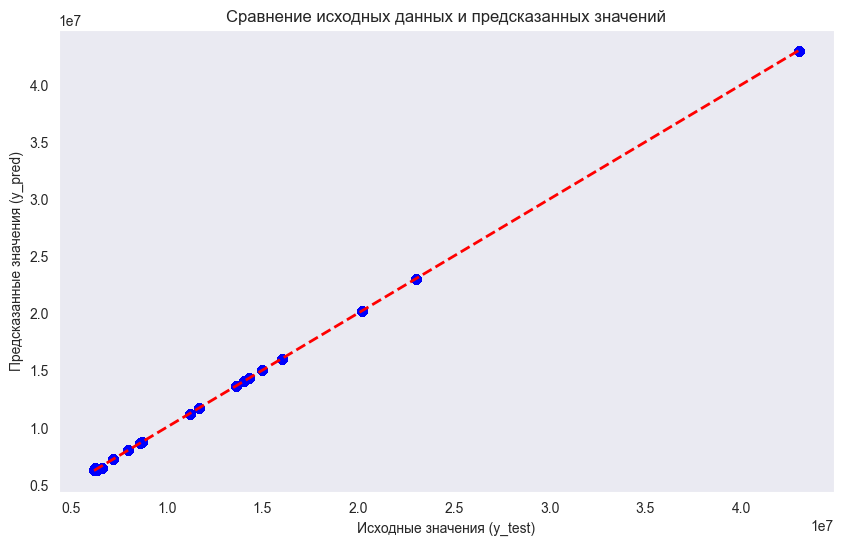

In [61]:
# График сравнения исходных данных и предсказанных значений
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Исходные значения (y_test)')
plt.ylabel('Предсказанные значения (y_pred)')
plt.title('Сравнение исходных данных и предсказанных значений')
plt.grid()
plt.show()

In [56]:
# Корреляция между факторами и ценой
correlations = data.corr()
print(correlations['price'].sort_values(ascending=False))

price                                      1.000000
total_area                                 0.851973
underground_name_станция Верхние Котлы     0.826900
floor                                      0.765272
rooms_count                                0.676910
total_floors                               0.530374
longitude                                  0.222024
underground_name_Нижегородская             0.203716
underground_name_Тропарево                 0.121909
underground_name_Маяковская                0.088919
underground_name_Преображенская площадь    0.043098
underground_name_Свиблово                  0.042453
underground_name_Поблизости нет метро     -0.065350
underground_name_Саларьево                -0.110609
underground_name_Электрозаводская         -0.130015
underground_distance                      -0.166462
latitude                                  -0.198847
underground_name_Селигерская              -0.489175
studio                                    -0.550772
Name: price,

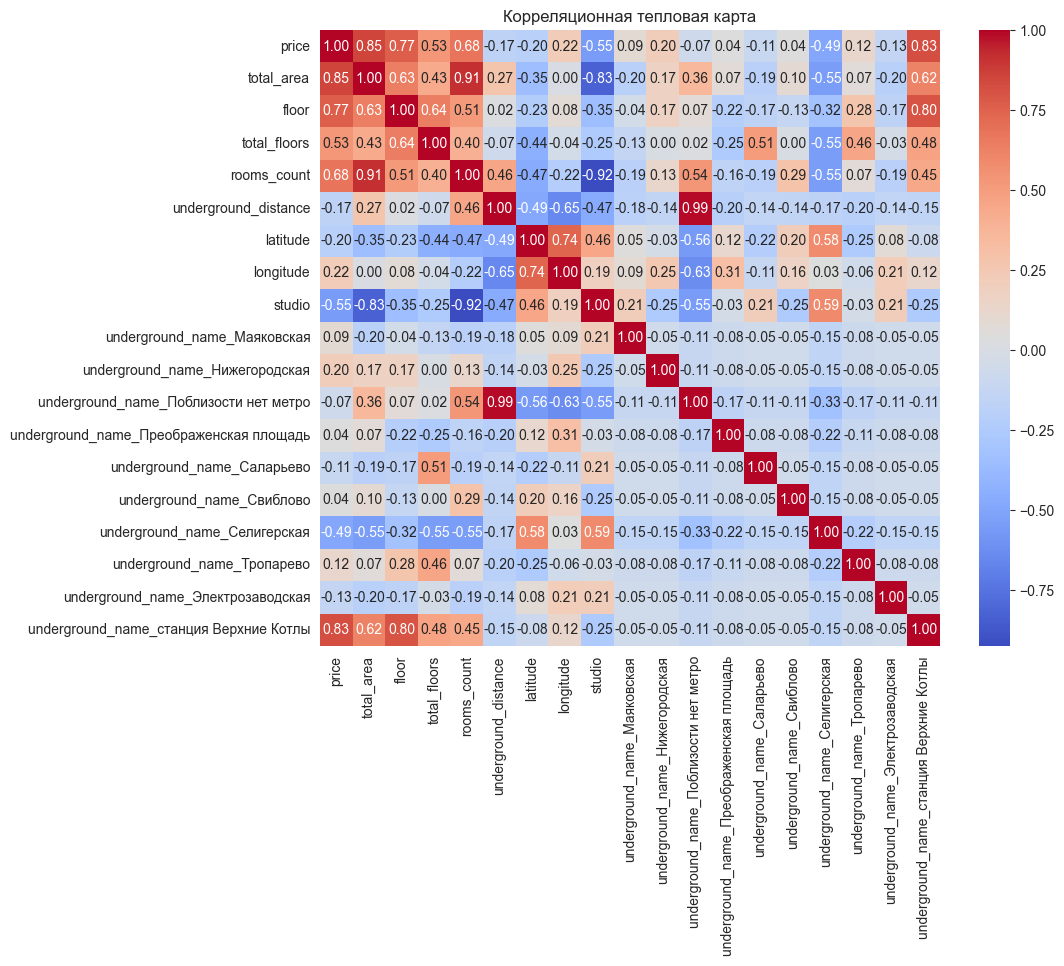

In [57]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляционная тепловая карта')
plt.show()

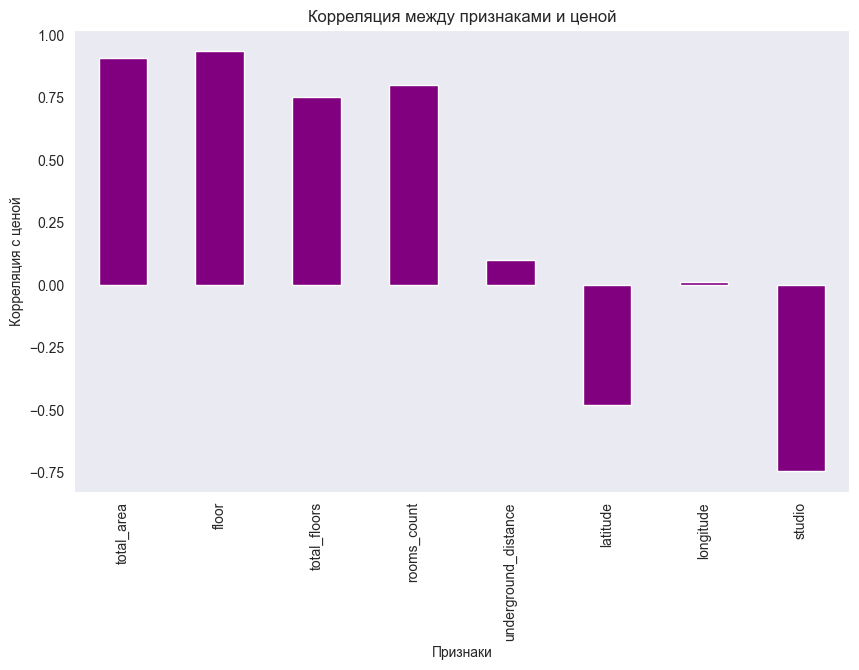

In [58]:
# График, отражающий корреляцию между ценой и исследуемыми признаками
prefixes = ['housing_type_', 'payment_type_', 'underground_name_']

relevant_correlations = correlations.corr()['price'].drop(index=['price'])
relevant_correlations = relevant_correlations[~relevant_correlations.index.str.startswith(tuple(prefixes))]

plt.figure(figsize=(10, 6))
relevant_correlations.plot(kind='bar', color='purple')
plt.xlabel('Признаки')
plt.ylabel('Корреляция с ценой')
plt.title('Корреляция между признаками и ценой')
plt.xticks(rotation=90)
plt.grid()
plt.show()

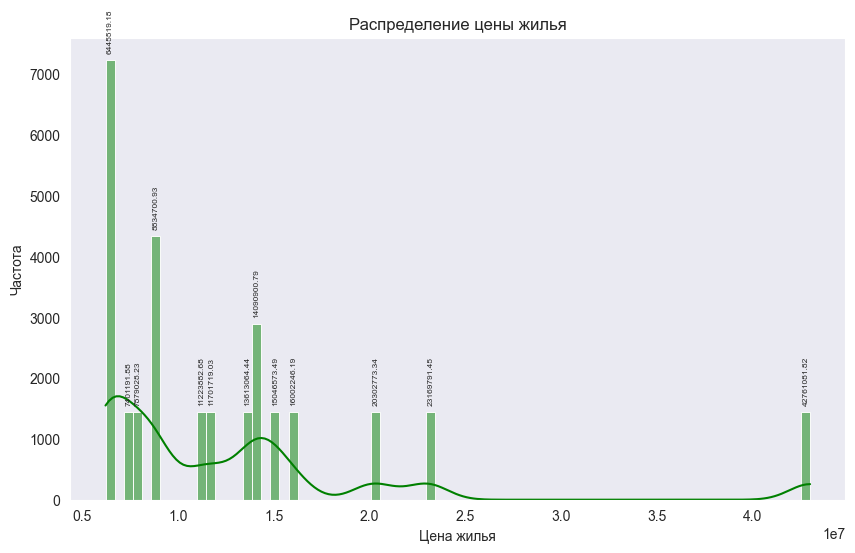

In [59]:
# Также отразим и распределение по ценам на жилье
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
ax = sns.histplot(data['price'], kde=True, color='green')
plt.xlabel('Цена жилья')
plt.ylabel('Частота')
plt.title('Распределение цены жилья')

height_threshold = ax.get_ylim()[1] * 0.05

for p in ax.patches:
    x_value = p.get_x() + p.get_width() / 2
    y_value = p.get_height()
    if y_value > height_threshold:
        ax.annotate(f'{x_value:.2f}', (x_value, y_value + 100), ha='center', va='bottom', rotation=90, fontsize=6)

plt.grid()
plt.show()

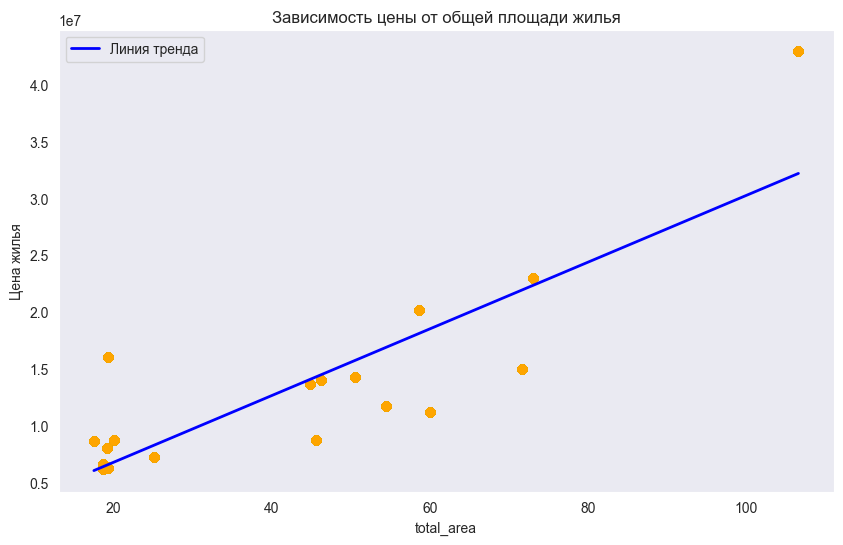

In [62]:
# График зависимости цены от общей площади жилья

plt.figure(figsize=(10, 6))
plt.scatter(data['total_area'], data['price'], color='orange', alpha=0.5)
plt.xlabel('total_area')
plt.ylabel('Цена жилья')
plt.title('Зависимость цены от общей площади жилья')

coefficients = np.polyfit(data['total_area'], data['price'], 1)
line_of_best_fit = np.poly1d(coefficients)

x_values = np.linspace(min(data['total_area']), max(data['total_area']), 100)
y_values = line_of_best_fit(x_values)

plt.plot(x_values, y_values, color='blue', linewidth=2, label='Линия тренда')

plt.grid()
plt.legend()
plt.show()

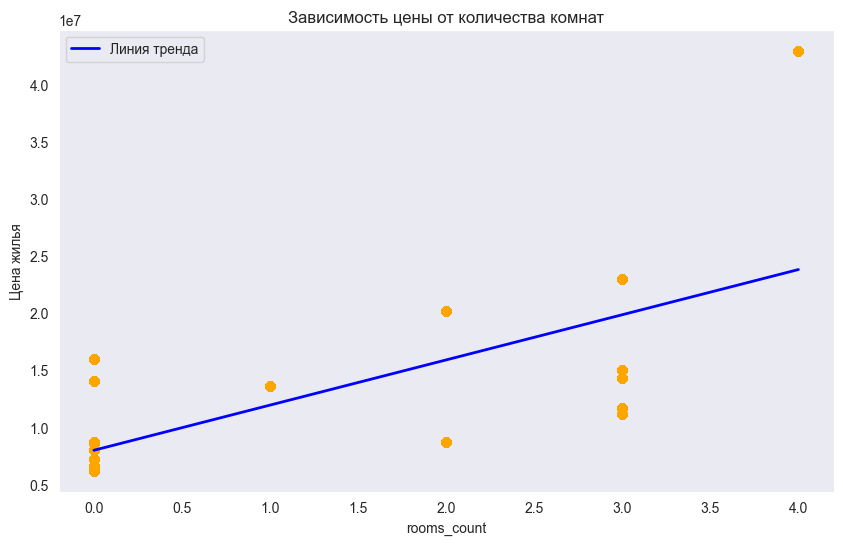

In [63]:
# График зависимости цены жилья от количества комнат

plt.figure(figsize=(10, 6))
plt.scatter(data['rooms_count'], data['price'], color='orange', alpha=0.5)
plt.xlabel('rooms_count')
plt.ylabel('Цена жилья')
plt.title('Зависимость цены от количества комнат')

coefficients = np.polyfit(data['rooms_count'], data['price'], 1)
line_of_best_fit = np.poly1d(coefficients)

x_values = np.linspace(min(data['rooms_count']), max(data['rooms_count']), 6)
y_values = line_of_best_fit(x_values)

plt.plot(x_values, y_values, color='blue', linewidth=2, label='Линия тренда')

plt.grid()
plt.legend()
plt.show()

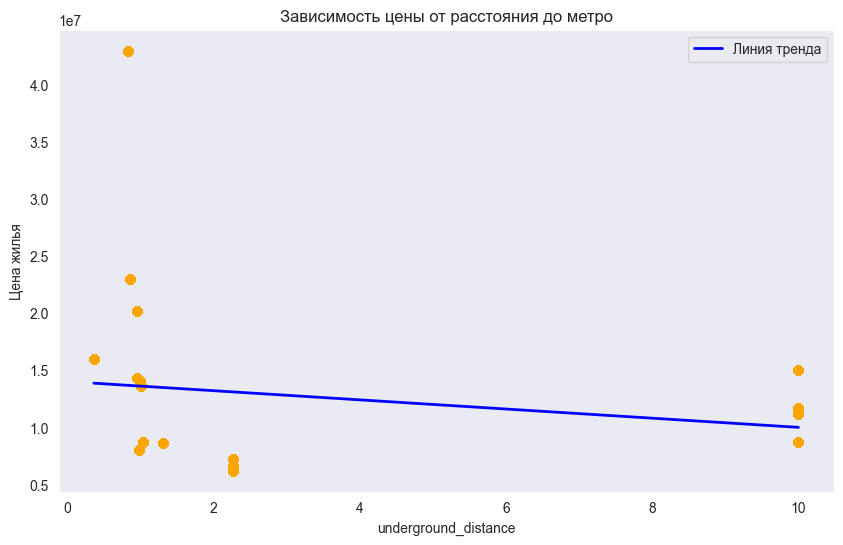

In [64]:
# График обратной зависимости цены жилья от расстояния до метро

plt.figure(figsize=(10, 6))
plt.scatter(data['underground_distance'], data['price'], color='orange', alpha=0.5)
plt.xlabel('underground_distance')
plt.ylabel('Цена жилья')
plt.title('Зависимость цены от расстояния до метро')

coefficients = np.polyfit(data['underground_distance'], data['price'], 1)
line_of_best_fit = np.poly1d(coefficients)

x_values = np.linspace(min(data['underground_distance']), max(data['underground_distance']), 10)
y_values = line_of_best_fit(x_values)

plt.plot(x_values, y_values, color='blue', linewidth=2, label='Линия тренда')

plt.grid()
plt.legend()
plt.show()

### Mетод взаимной классификации для определения наиболее значимых признаков

Воспользуемся методом взаимной классификации признаков для измерения зависимости функций от целевого значения «Bankrupt»

Метод mutual_info_classif вычисляет взаимную информационную ценность для каждой из независимых переменных по отношению к зависимой переменной и выбирает те, которые имеют наибольший информационный прирост. Иными словами, он в основном измеряет зависимость функций от целевого значения. На выходе определяется рейтинг (балл) значимости каждой переменной.

In [65]:
from sklearn.feature_selection import mutual_info_classif

importances = mutual_info_classif(X, y)
importances

array([2.69219143, 1.90281453, 1.89856589, 1.13367933, 2.04373765,
       2.38782157, 2.38865073, 0.61255814, 0.19164222, 0.19711748,
       0.43323762, 0.32534459, 0.12569169, 0.2056164 , 0.61132314,
       0.3279934 , 0.19649562, 0.20101038])

In [66]:
feature_importances = pd.Series(importances, X.columns[0:len(df.columns)]).sort_values(ascending=False)

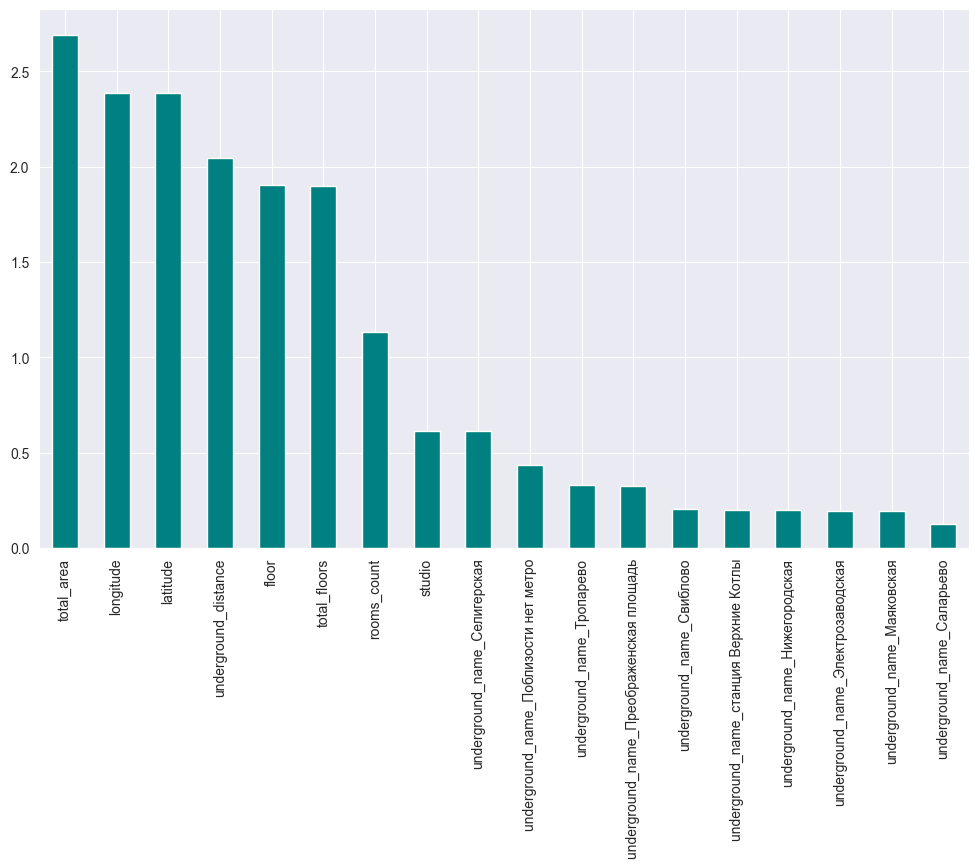

In [67]:
plt.figure(figsize = (12,7))
feature_importances.plot(kind='bar', color='teal')
plt.show()